## GMM이란?
GMM(Gaussian Mixture Model)은 데이터가 서로 다른 k개의 정규분포에서 생성되었다고 가정합니다.  
정규분포란 평균을 중심으로 대칭이며 표준편차에 따라 흩어진 정도가 정해지는 분포를 뜻하는데요.

데이터가 정규 분포를 따를 때 가장 큰 이점은 값이 특정 구간에 속할 확률을 계산할 수 있다는 점입니다.  
GMM은 이 확률을 통해서 클러스터를 구분합니다.

예를 들어 볼게요. 먼저, 아래 3개의 정규 분포가 있다고 하겠습니다.  
- F1(X): 평균 = -2, 표준편차 = 1
- F2(X): 평균 = 1.5, 표준편차 = 1.5
- F3(X): 평균 = 5, 표준편차 = 2

그림으로 나타내면 아래와 같습니다.

![이미지](../1주차_클러스터%20분석/image/GMM/19-1.png)

만약 6이라는 데이터가 관측되었을 때, 해당 데이터는 어떤 정규 분포에 속한다고 하는 게 가장 자연스러울까요?

평균엣 멀어질수록 확률이 작아진다는 것을 생각했을 때, 6이라는 데이터가 F1(X), F2(X)에 속할 확률은 매우 작습니다.  
아마도 평균이 6에 가장 가깝고, 분산도 큰 F3(X)에 속할 확률이 가장 높겠죠.

따라서, 6이라는 데이터는 F3(X)에 속하는 클러스터로 분류할 수 있습니다.

이런 식으로, <span style='color:yellowgreen'>특정 데이터의 값이 어떤 분포에 포함될 확률이 더 큰지를 따져서 각 클러스터로 구분</span>하는 게 GMM의 방법론입니다.

GMM을 사용하면 데이터가 단순하게 원형으로 분포되어 있을 때 뿐만 아니라, 좀 더 복잡한 형태(타원형, 비대칭 등)의 데이터도  
효과적으로 클러스터링을 할 수 있습니다.

하지만, GMM의 단점도 있습니다.

k-means와 비슷하게 사전에 클러스터 개수를 임의로 설정해야 하며, 그 값에 따라서 결과가 달라질 수 있습니다.

또, 특정 분포에 할당되는 데이터 수가 적으면 모수 추정이 잘 이뤄지지 않기 때문에, 충분히 많은 수의 데이터가 있지 않으면  
적용하기 어렵습니다.

마지막으로 정규 분포를 따른다고 가정하는 데이터를 구분해 주는 방법이기 때문에,  
정규 분포가 나올 수 없는 범주형 데이터는 다룰 수 없습니다.

## GMM 실습
그러면, 타원형 학습 데이터를 가지고 k-means와 GMM 모델 각각으로 클러스터링 해 보겠습니다.  
우선 분석에 사용할 데이터를 준비해 볼게요.

데이터는 sklearn의 `make_blobs()`로 생성할 건데요. `make_blobs()`로 생성한 데이터에  
특수 행렬을 곱해주면 타원형으로 길게 늘어진 데이터를 생성할 수 있습니다.

<Axes: xlabel='0', ylabel='1'>

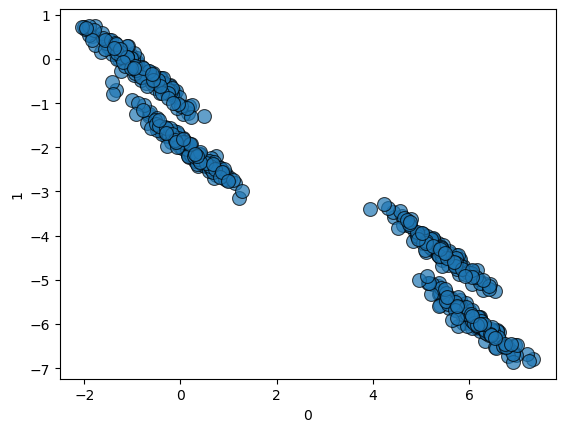

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

n_samples = 500  # 샘플 데이터 개수
centers = 4  # 클러스터 개수
cluster_std = 0.75  # 클러스터 내 표준편차
random_state = 13  # 샘플 데이터 고정

data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

# 데이터 타원형으로 만들기
tf = [[0.6, -0.6], [-0.4, 0.2]]
data_tf = data @ tf  # @: 행렬의 곱을 나타냄
df = pd.DataFrame(data_tf)

# 시각화
sns.scatterplot(x=df[0], y=df[1], alpha=0.7, edgecolor='k', s=100)

해당 데이터를 먼저 k-means로 클러스터링 해 보겠습니다. k는 4로 지정할게요.

c:\Users\emma1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

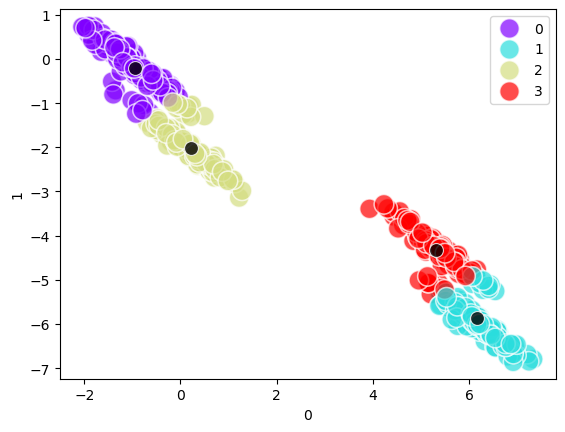

In [7]:
# k-means 학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(df)
df['kmeans_label'] = model.predict(df)
centers = model.cluster_centers_  # 각 클러스터의 Centroid

# 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], palette='rainbow', alpha=0.7, s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=100)

타원형의 데이터는 k-means로 클러스터링이 잘 되지 않네요. 그러면, GMM으로 클러스터링 한 결과는 어떨까요?
일단 `df['kmeans_label']`를 제거한 후에 GMM 모델을 학습시켜 볼게요.

In [8]:
df = df.drop(columns=['kmeans_label'], axis=1)

c:\Users\emma1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

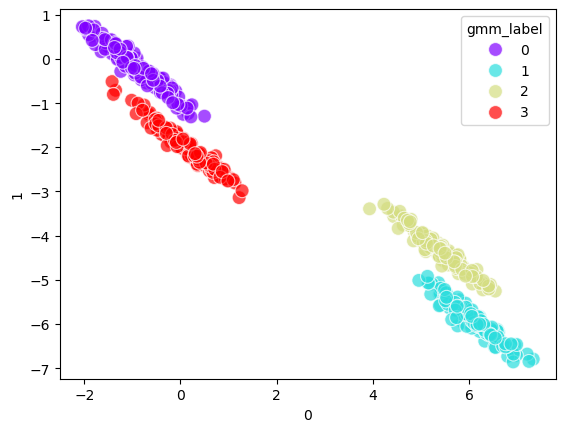

In [9]:
from sklearn.mixture import GaussianMixture

n_components = 4  # 분포 개수
random_state = 10  # 모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)

# GMM 모델 학습
model.fit(df)
df['gmm_label'] = model.predict(df)

# 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['gmm_label'], palette='rainbow', alpha=0.7, s=100)